In [1]:
import numpy as np 
import pandas as pd
import category_encoders as encoders
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection, metrics, naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from lightgbm import LGBMClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the Data

In [2]:
df_heart = pd.read_csv('heart.csv')
df_heart.shape

(918, 12)

In [3]:
df_heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df_heart[numerical].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [6]:
scaler = RobustScaler()
encoder_num = scaler.fit_transform(df_heart[numerical])
encoded_num = pd.DataFrame(encoder_num, columns =['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
encoded_num.shape
print(encoded_num.head(10))

        Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0 -1.076923        0.5     0.704000  0.944444 -0.400000
1 -0.384615        1.5    -0.458667  0.500000  0.266667
2 -1.307692        0.0     0.640000 -1.111111 -0.400000
3 -0.461538        0.4    -0.096000 -0.833333  0.600000
4  0.000000        1.0    -0.298667 -0.444444 -0.400000
5 -1.153846       -0.5     1.237333  0.888889 -0.400000
6 -0.692308        0.0     0.149333  0.888889 -0.400000
7  0.000000       -1.0    -0.160000  0.111111 -0.400000
8 -1.307692        0.5    -0.170667 -0.222222  0.600000
9 -0.461538       -0.5     0.650667 -0.500000 -0.400000


In [7]:
# First, we get the target label

df_target = df_heart['HeartDisease']
df_target.columns = ['target']
df_target.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [8]:

CATBoostENCODE = encoders.CatBoostEncoder()

encoder_cat = CATBoostENCODE.fit_transform(df_heart[categorical], df_target)
encoded_cat = pd.DataFrame(encoder_cat)


In [9]:
encoded_cat.describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.494726,0.539156,0.490911,0.511991,0.529615,0.233115
std,0.164178,0.266597,0.104111,0.276616,0.378010,0.423046
min,0.092229,0.079198,0.221911,0.119491,0.003274,0.000000
25%,0.423444,0.284799,0.376379,0.262432,0.164025,0.000000
50%,0.534265,0.662145,0.527602,0.370408,0.802769,0.000000
75%,0.642816,0.792397,0.566703,0.845685,0.866773,0.000000
max,0.851126,0.925563,0.776688,0.925563,0.925563,1.000000


#### Model Preparation

In [10]:
# Prepare the training data set
df_train = df_heart.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df_train.drop(numerical, axis=1, inplace=True)
df_train.drop(categorical, axis=1, inplace=True)
df_train = pd.concat([df_train, encoded_num, encoded_cat], axis=1) 
df_train.head(10)

,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
0,0,-1.076923,0.5,0.704000,0.944444,-0.400000,0.553377,0.553377,0.553377,0.553377,0.553377,0
1,1,-0.384615,1.5,-0.458667,0.500000,0.266667,0.553377,0.553377,0.276688,0.276688,0.553377,0
2,0,-1.307692,0.0,0.640000,-1.111111,-0.400000,0.276688,0.276688,0.553377,0.517792,0.276688,0
3,1,-0.461538,0.4,-0.096000,-0.833333,0.600000,0.776688,0.553377,0.517792,0.553377,0.776688,0
4,0,0.000000,1.0,-0.298667,-0.444444,-0.400000,0.184459,0.776688,0.638344,0.388344,0.184459,0
5,0,-1.153846,-0.5,1.237333,0.888889,-0.400000,0.138344,0.517792,0.510675,0.310675,0.138344,0
6,0,-0.692308,0.0,0.149333,0.888889,-0.400000,0.851126,0.184459,0.425563,0.258896,0.110675,0
7,0,0.000000,-1.0,-0.160000,0.111111,-0.400000,0.110675,0.138344,0.364768,0.221911,0.092229,0
8,1,-1.307692,0.5,-0.170667,-0.222222,0.600000,0.092229,0.776688,0.319172,0.776688,0.851126,0
9,0,-0.461538,-0.5,0.650667,-0.500000,-0.400000,0.638344,0.110675,0.394820,0.194172,0.079054,0


In [12]:
y = df_train.iloc[:,0:1]
X = df_train.iloc[:,1:]

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [14]:
df_performance = pd.DataFrame(columns=['Model', 'Balanced Accuracy', 'Accuracy', 'Precision', 'F1', 'Recall', 'ROC AUC'])
df_performance

,Model,Balanced Accuracy,Accuracy,Precision,F1,Recall,ROC AUC


In [15]:
def model_performance (p_test, p_train, p_test_prob, p_train_prob, Y_test, y_train, model_name):
    global df_performance
    predicted_test = pd.DataFrame(p_test)
    predicted_train = pd.DataFrame(p_train)
    print('=============================================')
    print('Scoring Metrics for {} (Validation)'.format(model_name))
    print('=============================================')
    print('Balanced Accuracy Score = {:2.3f}'.format(metrics.balanced_accuracy_score(Y_test, predicted_test)))
    print('Accuracy Score = {:2.3f}'.format(metrics.accuracy_score(Y_test, predicted_test)))
    print('Precision Score = {:2.3f}'.format(metrics.precision_score(Y_test, predicted_test)))
    print('F1 Score = {:2.3f}'.format(metrics.f1_score(Y_test, predicted_test, labels=['0','1'])))
    print('Recall Score = {:2.3f}'.format(metrics.recall_score(Y_test, predicted_test, labels=['0','1'])))
    print('ROC AUC Score = {:2.3f}'.format(metrics.roc_auc_score(Y_test, predicted_test, labels=['0','1'])))
    print('Confusion Matrix')
    print('==================')
    print(metrics.confusion_matrix(Y_test, predicted_test))
    print('==================')
    print(metrics.classification_report(Y_test, predicted_test, target_names=['0','1']))
    metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_test, predicted_test)).plot()

    df_performance = df_performance.append({'Model':model_name
                                            , 'Balanced Accuracy': metrics.balanced_accuracy_score(Y_test, predicted_test)
                                            , 'Accuracy' :metrics.accuracy_score(Y_test, predicted_test)
                                            , 'Precision' :metrics.precision_score(Y_test, predicted_test)
                                            , 'F1':metrics.f1_score(Y_test, predicted_test, labels=['0','1'])
                                            , 'Recall': metrics.recall_score(Y_test, predicted_test, labels=['0','1'])
                                            , 'ROC AUC': metrics.roc_auc_score(Y_test, predicted_test, labels=['0','1'])
                                           }, ignore_index = True)

    
    fpr_test, tpr_test, _ = metrics.roc_curve(Y_test, p_test_prob)

    roc_auc_test = metrics.roc_auc_score(Y_test, predicted_test, labels=['0','1'])

    # Precision x Recall Curve
    precision_test, recall_test, thresholds_test = metrics.precision_recall_curve(Y_test, p_test_prob)

    print('=============================================')
    print('Scoring Metrics for {} (Training)'.format(model_name))
    print('=============================================')
    print('Balanced Accuracy Score = {:2.3f}'.format(metrics.balanced_accuracy_score(y_train, predicted_train)))
    print('Accuracy Score = {:2.3f}'.format(metrics.accuracy_score(y_train, predicted_train)))
    print('Precision Score = {:2.3f}'.format(metrics.precision_score(y_train, predicted_train)))
    print('F1 Score = {:2.3f}'.format(metrics.f1_score(y_train, predicted_train)))
    print('Recall Score = {:2.3f}'.format(metrics.recall_score(y_train, predicted_train, labels=['0','1'])))
    print('ROC AUC Score = {:2.3f}'.format(metrics.roc_auc_score(y_train, predicted_train, labels=['0','1'])))
    print('Confusion Matrix')
    print('==================')
    print(metrics.confusion_matrix(y_train, predicted_train))
    print('==================')
    print(metrics.classification_report(y_train, predicted_train, target_names=['0','1']))
    metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, predicted_train)).plot()

    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, p_train_prob)

    roc_auc_train = metrics.roc_auc_score(y_train, predicted_train, labels=['0','1'])

    # Subplot of 1 x 2 matrix 
    print('======= ROC Curve and Precision x Recall Curve =======')
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(fpr_test, tpr_test, color='darkorange', label='ROC curve - Validation (area = %0.3f)' % roc_auc_test)
    ax[0].plot(fpr_train, tpr_train, color='darkblue', label='ROC curve - Training (area = %0.3f)' % roc_auc_train)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC Curve')
    ax[0].legend(loc="lower right")

    # Precision x Recall Curve
    precision_train, recall_train, thresholds_train = metrics.precision_recall_curve(y_train, p_train_prob)
    ax[1].plot(recall_test, precision_test, color='darkorange')
    ax[1].plot(recall_train, precision_train, color='darkblue')
    ax[1].set_title('Precision-Recall Curve')
    ax[1].set_ylabel('Precision')
    ax[1].set_xlabel('Recall')

    plt.show()

### Model 1 - Regression

In [19]:
p_cv = 5
p_score = 'accuracy'


In [20]:
reg_param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [21]:
print('Train X = {}, Train Y ={}'.format(X_train.shape, y_train.shape))

Train X = (734, 11), Train Y =(734, 1)


In [22]:
# clf_1 = LogisticRegression(max_iter=10000, class_weight='balanced', penalty='l2', C=1.0, solver='lbfgs')
clf_1 = LogisticRegression(max_iter=10000, C=0.1)
cv = model_selection.StratifiedKFold(n_splits=p_cv, random_state=100, shuffle=True)
model_1 = model_selection.GridSearchCV(clf_1, reg_param_grid, cv=cv, scoring=p_score, n_jobs=-1, verbose=1)
model_1.fit(X_train, y_train.values.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\jinen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jinen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jinen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jinen\AppData\Local\Programs\Pytho

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(C=0.1, max_iter=10000), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [23]:
print(model_1.best_estimator_)
print(model_1.best_params_)

LogisticRegression(C=0.1, max_iter=10000, solver='liblinear')
{'penalty': 'l2', 'solver': 'liblinear'}


In [24]:
p_train_1 = model_1.predict(X_train)
p_test_1 = model_1.predict(X_test)
p_train_proba_1 = model_1.predict_proba(X_train)[:,1]
p_test_proba_1 = model_1.predict_proba(X_test)[:,1]

Scoring Metrics for Logistic Regression (Validation)
Balanced Accuracy Score = 0.869
Accuracy Score = 0.875
Precision Score = 0.881
F1 Score = 0.893
Recall Score = 0.906
ROC AUC Score = 0.869
Confusion Matrix
[[65 13]
 [10 96]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        78
           1       0.88      0.91      0.89       106

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


Scoring Metrics for Logistic Regression (Training)
Balanced Accuracy Score = 0.832
Accuracy Score = 0.837
Precision Score = 0.829
F1 Score = 0.855
Recall Score = 0.883
ROC AUC Score = 0.832
Confusion Matrix
[[259  73]
 [ 47 355]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       332
           1       0.83      0.88      0.86       402

    accuracy                           0.84       734
   macro avg       0.84      0.83      0.83       734
weighted avg       0.84      0.84      0.84       734

======= ROC Curve and Precision x Recall Curve =======


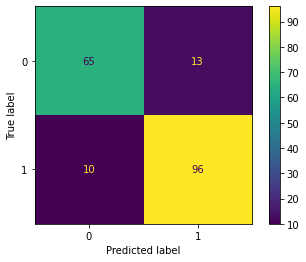

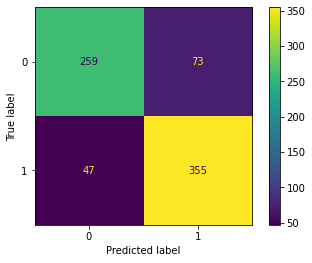

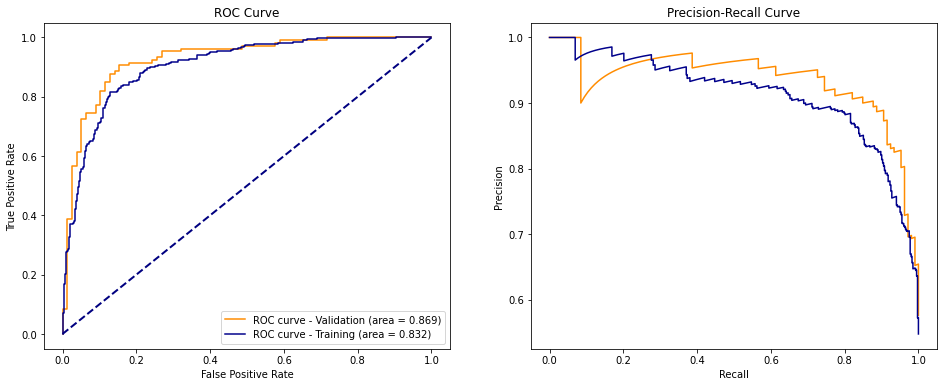

In [25]:
model_performance(p_test_1, p_train_1, p_test_proba_1, p_train_proba_1, y_test, y_train, 'Logistic Regression')

#### Model 2 - Decision Tree

In [26]:
estimators = [25,50,75,100]
max_depth = [5]
min_samples_split = [20, 50, 75, 100, 150, 200]
min_samples_leaf = [25, 50, 75, 100, 150, 200]

In [27]:
clf_2 = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

cv = model_selection.StratifiedKFold(n_splits=p_cv, random_state=100, shuffle=True)

model_2 = model_selection.GridSearchCV(clf_2, tree_param_grid, cv=cv, scoring=p_score, n_jobs=-1, verbose=1)
model_2.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5],
                         'min_samples_leaf': [25, 50, 75, 100, 150, 200],
                         'min_samples_split': [20, 50, 75, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [28]:
print(model_2.best_estimator_)
print(model_2.best_params_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=20)
{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 20}


In [29]:
p_train_2 = model_2.predict(X_train)
p_test_2 = model_2.predict(X_test)
p_train_proba_2 = model_1.predict_proba(X_train)[:,1]
p_test_proba_2 = model_1.predict_proba(X_test)[:,1]

Scoring Metrics for Decision Tree (Validation)
Balanced Accuracy Score = 0.846
Accuracy Score = 0.848
Precision Score = 0.875
F1 Score = 0.867
Recall Score = 0.858
ROC AUC Score = 0.846
Confusion Matrix
[[65 13]
 [15 91]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        78
           1       0.88      0.86      0.87       106

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

Scoring Metrics for Decision Tree (Training)
Balanced Accuracy Score = 0.870
Accuracy Score = 0.875
Precision Score = 0.860
F1 Score = 0.889
Recall Score = 0.920
ROC AUC Score = 0.870
Confusion Matrix
[[272  60]
 [ 32 370]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       332
           1       0.86      0.92      0.89       402

    accuracy                           0.87       734
   macro 

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


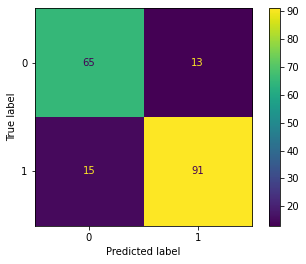

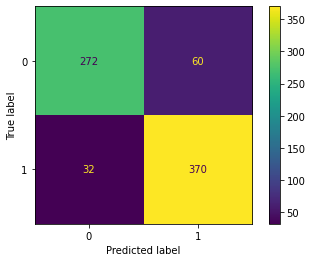

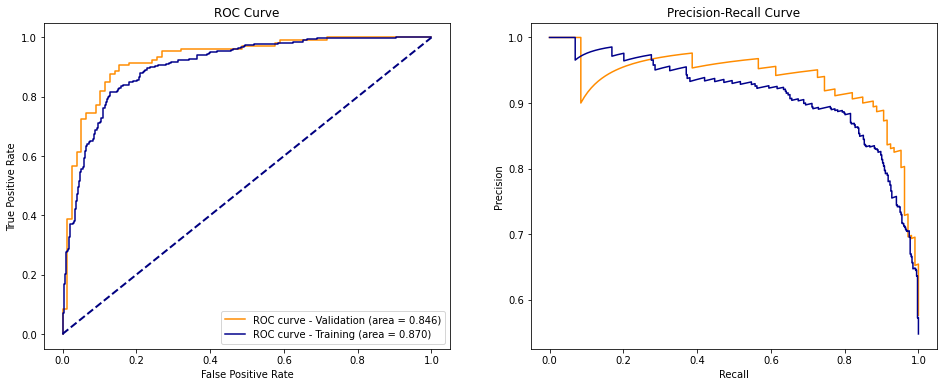

In [30]:
model_performance(p_test_2, p_train_2, p_test_proba_2, p_train_proba_2, y_test, y_train, 'Decision Tree')

#### Model 3 - KNN

In [31]:
model_3 = KNeighborsClassifier(n_neighbors=10)

In [32]:
model_3.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10)

In [33]:
p_train_3 = model_3.predict(X_train)
p_test_3 = model_3.predict(X_test)
p_train_proba_3 = model_3.predict_proba(X_train)[:,1]
p_test_proba_3 = model_3.predict_proba(X_test)[:,1]

Scoring Metrics for kNN (Validation)
Balanced Accuracy Score = 0.859
Accuracy Score = 0.859
Precision Score = 0.892
F1 Score = 0.875
Recall Score = 0.858
ROC AUC Score = 0.859
Confusion Matrix
[[67 11]
 [15 91]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        78
           1       0.89      0.86      0.88       106

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Scoring Metrics for kNN (Training)
Balanced Accuracy Score = 0.852
Accuracy Score = 0.851
Precision Score = 0.877
F1 Score = 0.862
Recall Score = 0.848
ROC AUC Score = 0.852
Confusion Matrix
[[284  48]
 [ 61 341]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       332
           1       0.88      0.85      0.86       402

    accuracy                           0.85       734
   macro avg       0.85      

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


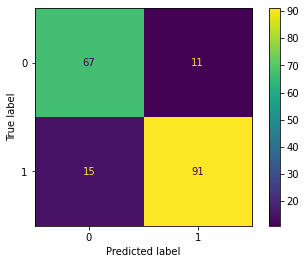

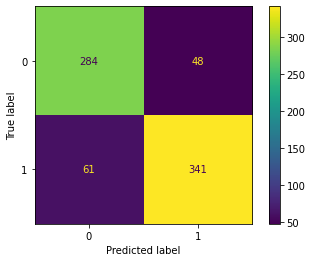

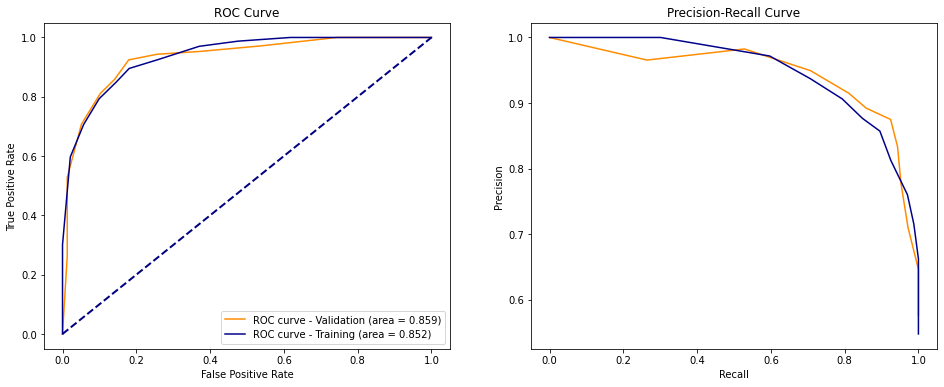

In [34]:
model_performance(p_test_3, p_train_3, p_test_proba_3, p_train_proba_3, y_test, y_train, 'kNN')

#### Model 4 - Random Forest

In [35]:
estimators = [25,50,75,100]
max_depth = [5]
min_samples_split = [20, 50, 75, 100, 150, 200]
min_samples_leaf = [25, 50, 75, 100, 150, 200]## Decision Tree

In [36]:
clf_4 = RandomForestClassifier()

forest_params_grid={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf  }

In [37]:
cv = model_selection.StratifiedKFold(n_splits=p_cv, random_state=100, shuffle=True)

model_4 = model_selection.GridSearchCV(clf_4, forest_params_grid, cv=cv, scoring=p_score, n_jobs=-1, verbose=1)
model_4.fit(X_train, y_train.values.ravel())


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5],
                         'min_samples_leaf': [25, 50, 75, 100, 150, 200],
                         'min_samples_split': [20, 50, 75, 100, 150, 200],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [38]:
print(model_4.best_params_)
print(model_4.best_estimator_)

{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 75}
RandomForestClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=20,
                       n_estimators=75)


In [39]:
p_train_4 = model_4.predict(X_train)
p_test_4 = model_4.predict(X_test)
p_train_proba_4 = model_4.predict_proba(X_train)[:,1]
p_test_proba_4 = model_4.predict_proba(X_test)[:,1]

Scoring Metrics for Random Forest (Validation)
Balanced Accuracy Score = 0.892
Accuracy Score = 0.897
Precision Score = 0.899
F1 Score = 0.912
Recall Score = 0.925
ROC AUC Score = 0.892
Confusion Matrix
[[67 11]
 [ 8 98]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        78
           1       0.90      0.92      0.91       106

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

Scoring Metrics for Random Forest (Training)
Balanced Accuracy Score = 0.867
Accuracy Score = 0.872
Precision Score = 0.858
F1 Score = 0.887
Recall Score = 0.918
ROC AUC Score = 0.867
Confusion Matrix
[[271  61]
 [ 33 369]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       332
           1       0.86      0.92      0.89       402

    accuracy                           0.87       734
   macro 

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


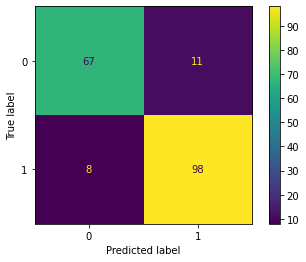

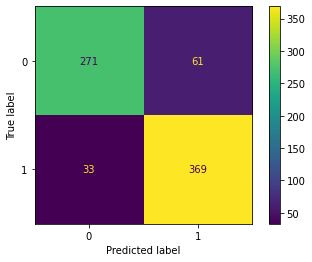

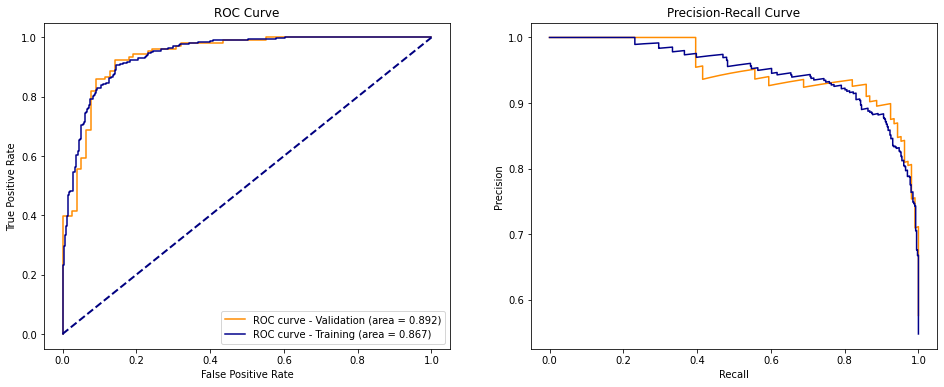

In [40]:
model_performance(p_test_4, p_train_4, p_test_proba_4, p_train_proba_4, y_test, y_train, 'Random Forest')

####  Model 5 - SVM Classifer

In [42]:
C = [0.1, 1.0, 10, 100]
gamma = [0.1,0.01,0.001, 0.0001]
kernel = ['linear','rbf']

In [43]:
clf_5 = SVC(probability=True)

SVC_params_grid={'C':C,
           'gamma':gamma,
           'kernel':kernel}

In [44]:
cv = model_selection.StratifiedKFold(n_splits=p_cv, random_state=100, shuffle=True)

model_5 = model_selection.GridSearchCV(clf_5, SVC_params_grid, cv=cv, scoring=p_score, n_jobs=-1, verbose=1)
model_5.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [45]:
print(model_5.best_params_)
print(model_5.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, probability=True)


In [46]:
p_train_5 = model_5.predict(X_train)
p_test_5 = model_5.predict(X_test)
p_train_proba_5 = model_5.predict_proba(X_train)[:,1]
p_test_proba_5 = model_5.predict_proba(X_test)[:,1]

Scoring Metrics for SVM (Validation)
Balanced Accuracy Score = 0.889
Accuracy Score = 0.891
Precision Score = 0.906
F1 Score = 0.906
Recall Score = 0.906
ROC AUC Score = 0.889
Confusion Matrix
[[68 10]
 [10 96]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        78
           1       0.91      0.91      0.91       106

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Scoring Metrics for SVM (Training)
Balanced Accuracy Score = 0.905
Accuracy Score = 0.907
Precision Score = 0.901
F1 Score = 0.917
Recall Score = 0.933
ROC AUC Score = 0.905
Confusion Matrix
[[291  41]
 [ 27 375]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       332
           1       0.90      0.93      0.92       402

    accuracy                           0.91       734
   macro avg       0.91      

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


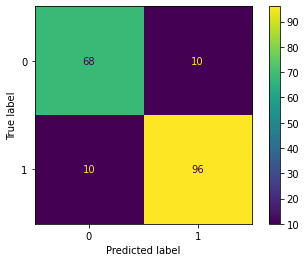

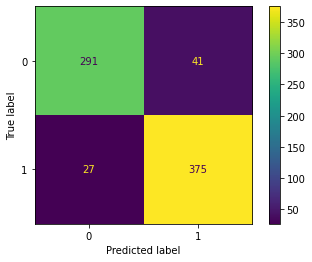

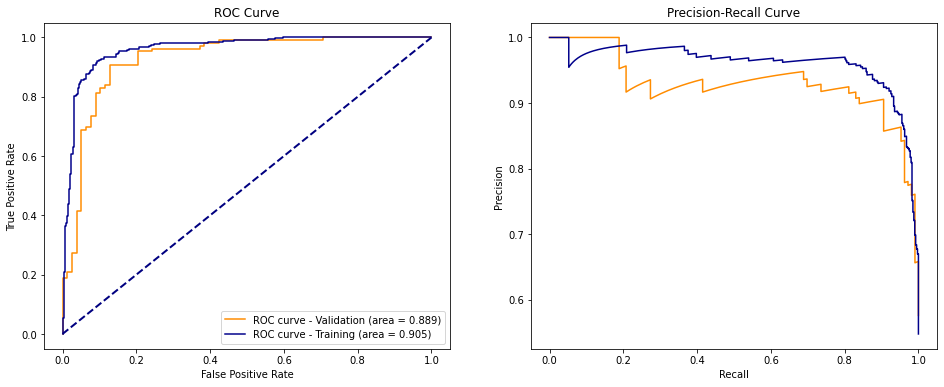

In [47]:
model_performance(p_test_5, p_train_5, p_test_proba_5, p_train_proba_5, y_test, y_train, 'SVM')

#### Model 6 - XGBoost

In [48]:
model_6 = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth = 3, colsample_bytree = 0.8, subsample= 0.8, n_jobs=-1)


In [49]:
model_6.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [50]:
p_train_6 = model_6.predict(X_train)
p_test_6 = model_6.predict(X_test)
p_train_proba_6 = model_6.predict_proba(X_train)[:,1]
p_test_proba_6 = model_6.predict_proba(X_test)[:,1]

Scoring Metrics for XGBoost (Validation)
Balanced Accuracy Score = 0.887
Accuracy Score = 0.891
Precision Score = 0.898
F1 Score = 0.907
Recall Score = 0.915
ROC AUC Score = 0.887
Confusion Matrix
[[67 11]
 [ 9 97]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        78
           1       0.90      0.92      0.91       106

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Scoring Metrics for XGBoost (Training)
Balanced Accuracy Score = 0.892
Accuracy Score = 0.896
Precision Score = 0.879
F1 Score = 0.909
Recall Score = 0.940
ROC AUC Score = 0.892
Confusion Matrix
[[280  52]
 [ 24 378]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       332
           1       0.88      0.94      0.91       402

    accuracy                           0.90       734
   macro avg       0.

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


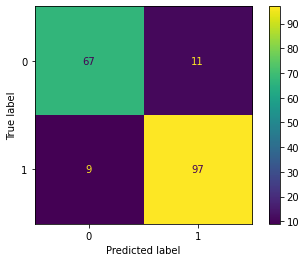

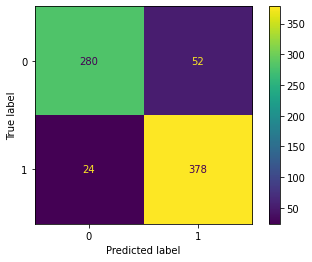

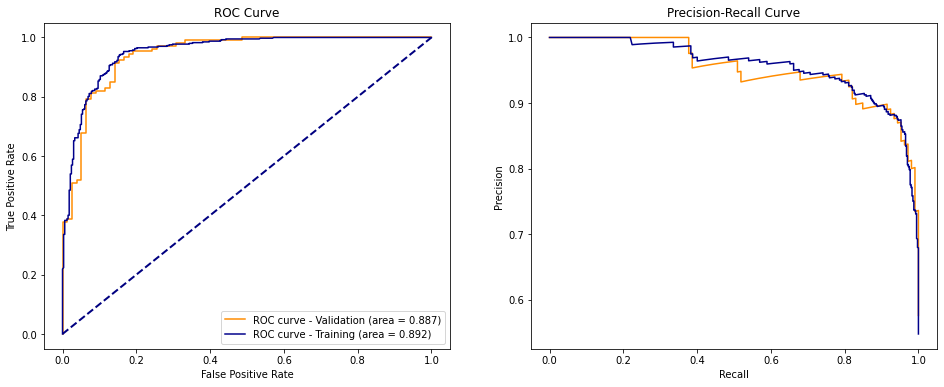

In [51]:
model_performance(p_test_6, p_train_6, p_test_proba_6, p_train_proba_6, y_test, y_train, 'XGBoost')

####  Model 7 - LGBM

In [52]:
model_7 = LGBMClassifier(random_state=1234, boosting_type= 'gbdt', objective= 'binary', feature_fraction=0.7, bagging_fraction=0.7, learning_rate=0.01, max_depth=1, silent=True, metric='auc', n_estimators=5000, n_jobs = -1)


In [53]:
model_7.fit(X_train, y_train.values.ravel())

C:\Users\jinen\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.7, learning_rate=0.01,
               max_depth=1, metric='auc', n_estimators=5000, objective='binary',
               random_state=1234, silent=True)

In [54]:
p_train_7 = model_7.predict(X_train)
p_test_7 = model_7.predict(X_test)
p_train_proba_7 = model_7.predict_proba(X_train)[:,1]
p_test_proba_7 = model_7.predict_proba(X_test)[:,1]

Scoring Metrics for LGBM (Validation)
Balanced Accuracy Score = 0.870
Accuracy Score = 0.870
Precision Score = 0.902
F1 Score = 0.885
Recall Score = 0.868
ROC AUC Score = 0.870
Confusion Matrix
[[68 10]
 [14 92]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        78
           1       0.90      0.87      0.88       106

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Scoring Metrics for LGBM (Training)
Balanced Accuracy Score = 0.909
Accuracy Score = 0.911
Precision Score = 0.908
F1 Score = 0.920
Recall Score = 0.933
ROC AUC Score = 0.909
Confusion Matrix
[[294  38]
 [ 27 375]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       332
           1       0.91      0.93      0.92       402

    accuracy                           0.91       734
   macro avg       0.91    

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


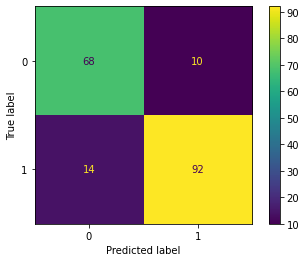

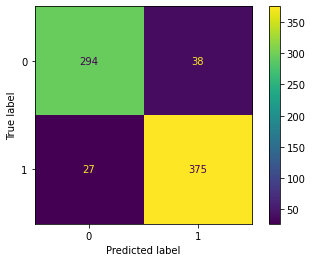

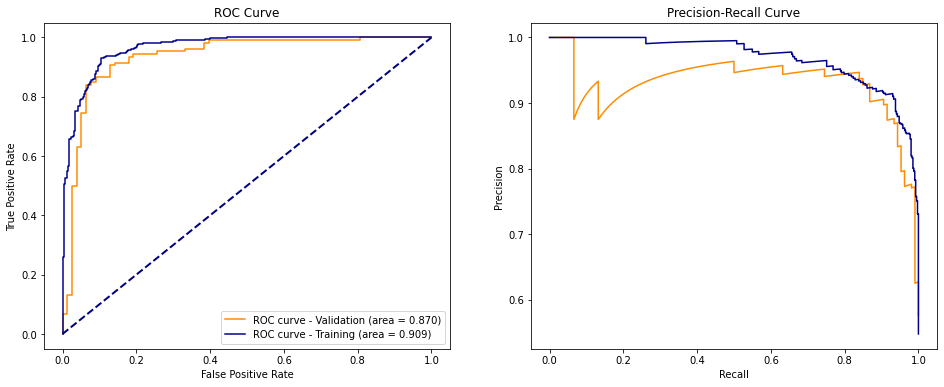

In [55]:
model_performance(p_test_7, p_train_7, p_test_proba_7, p_train_proba_7, y_test, y_train, 'LGBM')

####  Model 8 - Voting Ensemble

In [56]:
# Instantiate the learners (classifiers)
learner_1 = LogisticRegression(**model_1.best_params_, max_iter=10000)
learner_2 = DecisionTreeClassifier(**model_2.best_params_)
learner_3 = KNeighborsClassifier(n_neighbors=10)
learner_4 = RandomForestClassifier(**model_4.best_params_)
learner_5 = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth = 3, colsample_bytree = 0.8, subsample= 0.8, n_jobs=-1)
learner_6 = naive_bayes.GaussianNB()
learner_7 = SVC(gamma=0.001, probability=True)
learner_8 = LGBMClassifier(random_state=1234, boosting_type= 'gbdt', objective= 'binary', feature_fraction=0.7, bagging_fraction=0.7, learning_rate=0.01, max_depth=1, silent=True, metric='auc', n_estimators=5000, n_jobs = -1)

## Hard Voting 

In [57]:
# Instantiate the voting classifier
hard_voting = VotingClassifier([('LogReg', learner_1),
                           ('Tree', learner_2),
                           ('KNN', learner_3),
                           ('Forest', learner_4),
                          ('XGBoost', learner_5),
                          ('NB', learner_6),
                          ('LGBM', learner_8)
                               ],
                            voting='hard')


In [58]:
hard_voting.fit(X_train, y_train.values.ravel())

C:\Users\jinen\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(max_iter=10000,
                                                 solver='liblinear')),
                             ('Tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=25,
                                                     min_samples_split=20)),
                             ('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('Forest',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_leaf=25,
                                                     min_samples_split=20,
                                                     n_estimators=75)),
                             ('XGBoost',
                              XGBClassif...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('NB', GaussianNB()),
                             ('LGBM',
                              LGBMClassifier(bagging_fraction=0.7,
                                             feature_fraction=0.7,
                                             learning_rate=0.01, max_depth=1,
                                             metric='auc', n_estimators=5000,
                                             objective='binary',
                                             random_state=1234, silent=True))])

In [59]:
p_train_hardvoting = hard_voting.predict(X_train)
p_test_hardvoting = hard_voting.predict(X_test)

Scoring Metrics for Hard Voting (Validation)
Balanced Accuracy Score = 0.8917513304305758
Accuracy Score = 0.8967391304347826
Precision Score = 0.8990825688073395
F1 Score = 0.9116279069767442
Recall Score = 0.9245283018867925
ROC AUC Score = 0.8917513304305758
Confusion Matrix
[[67 11]
 [ 8 98]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        78
           1       0.90      0.92      0.91       106

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

Scoring Metrics for Hard Voting (Training)
Balanced Accuracy Score = 0.8868608763411856
Accuracy Score = 0.8910081743869209
Precision Score = 0.8779342723004695
F1 Score = 0.9033816425120773
Recall Score = 0.9303482587064676
ROC AUC Score = 0.8868608763411857
Confusion Matrix
[[280  52]
 [ 28 374]]
              precision    recall  f1-score   support

           0       0

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\148594293.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':'Hard Voting'


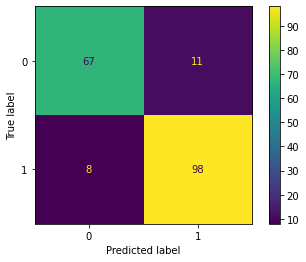

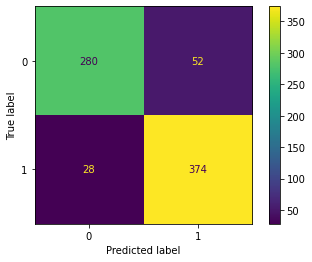

In [60]:
predicted_test = pd.DataFrame(p_test_hardvoting)
predicted_train = pd.DataFrame(p_train_hardvoting)
print('=============================================')
print('Scoring Metrics for Hard Voting (Validation)')
print('=============================================')
print('Balanced Accuracy Score = {}'.format(metrics.balanced_accuracy_score(y_test, predicted_test)))
print('Accuracy Score = {}'.format(metrics.accuracy_score(y_test, predicted_test)))
print('Precision Score = {}'.format(metrics.precision_score(y_test, predicted_test)))
print('F1 Score = {}'.format(metrics.f1_score(y_test, predicted_test, labels=['0','1'])))
print('Recall Score = {}'.format(metrics.recall_score(y_test, predicted_test, labels=['0','1'])))
print('ROC AUC Score = {}'.format(metrics.roc_auc_score(y_test, predicted_test, labels=['0','1'])))
print('Confusion Matrix')
print('==================')
print(metrics.confusion_matrix(y_test, predicted_test))
print('==================')
print(metrics.classification_report(y_test, predicted_test, target_names=['0','1']))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, predicted_test)).plot()

df_performance = df_performance.append({'Model':'Hard Voting'
                                        , 'Balanced Accuracy': metrics.balanced_accuracy_score(y_test, predicted_test)
                                        , 'Accuracy' :metrics.accuracy_score(y_test, predicted_test)
                                        , 'Precision' :metrics.precision_score(y_test, predicted_test)
                                        , 'F1':metrics.f1_score(y_test, predicted_test, labels=['0','1'])
                                        , 'Recall': metrics.recall_score(y_test, predicted_test, labels=['0','1'])
                                        , 'ROC AUC': metrics.roc_auc_score(y_test, predicted_test, labels=['0','1'])
                                       }, ignore_index = True)


print('=============================================')
print('Scoring Metrics for Hard Voting (Training)')
print('=============================================')
print('Balanced Accuracy Score = {}'.format(metrics.balanced_accuracy_score(y_train, predicted_train)))
print('Accuracy Score = {}'.format(metrics.accuracy_score(y_train, predicted_train)))
print('Precision Score = {}'.format(metrics.precision_score(y_train, predicted_train)))
print('F1 Score = {}'.format(metrics.f1_score(y_train, predicted_train)))
print('Recall Score = {}'.format(metrics.recall_score(y_train, predicted_train, labels=['0','1'])))
print('ROC AUC Score = {}'.format(metrics.roc_auc_score(y_train, predicted_train, labels=['0','1'])))
print('Confusion Matrix')
print('==================')
print(metrics.confusion_matrix(y_train, predicted_train))
print('==================')
print(metrics.classification_report(y_train, predicted_train, target_names=['0','1']))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, predicted_train)).plot()

## Soft Voting

In [61]:
# Instantiate the voting classifier
soft_voting = VotingClassifier([('LogReg', learner_1),
                           ('Tree', learner_2),
                           ('KNN', learner_3),
                           ('Forest', learner_4),
                          ('XGBoost', learner_5),
                          ('NB', learner_6),
                          ('LGBM', learner_8)
                               ],
                            voting='soft')

In [62]:
soft_voting.fit(X_train, y_train.values.ravel())

C:\Users\jinen\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(max_iter=10000,
                                                 solver='liblinear')),
                             ('Tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=25,
                                                     min_samples_split=20)),
                             ('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('Forest',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_leaf=25,
                                                     min_samples_split=20,
                                                     n_estimators=75)),
                             ('XGBoost',
                              XGBClassif...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('NB', GaussianNB()),
                             ('LGBM',
                              LGBMClassifier(bagging_fraction=0.7,
                                             feature_fraction=0.7,
                                             learning_rate=0.01, max_depth=1,
                                             metric='auc', n_estimators=5000,
                                             objective='binary',
                                             random_state=1234, silent=True))],
                 voting='soft')

In [63]:
p_train_softvoting = soft_voting.predict(X_train)
p_test_softvoting = soft_voting.predict(X_test)
p_train_proba_softvoting = soft_voting.predict_proba(X_train)[:,1]
p_test_proba_softvoting = soft_voting.predict_proba(X_test)[:,1]

Scoring Metrics for Soft Voting (Validation)
Balanced Accuracy Score = 0.884
Accuracy Score = 0.886
Precision Score = 0.905
F1 Score = 0.900
Recall Score = 0.896
ROC AUC Score = 0.884
Confusion Matrix
[[68 10]
 [11 95]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        78
           1       0.90      0.90      0.90       106

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Scoring Metrics for Soft Voting (Training)
Balanced Accuracy Score = 0.882
Accuracy Score = 0.886
Precision Score = 0.879
F1 Score = 0.898
Recall Score = 0.918
ROC AUC Score = 0.882
Confusion Matrix
[[281  51]
 [ 33 369]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       332
           1       0.88      0.92      0.90       402

    accuracy                           0.89       734
   macro avg 

C:\Users\jinen\AppData\Local\Temp\ipykernel_2448\4262248699.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


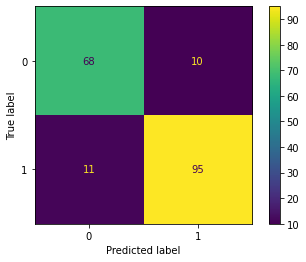

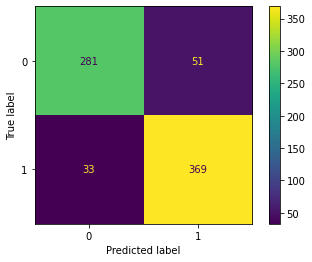

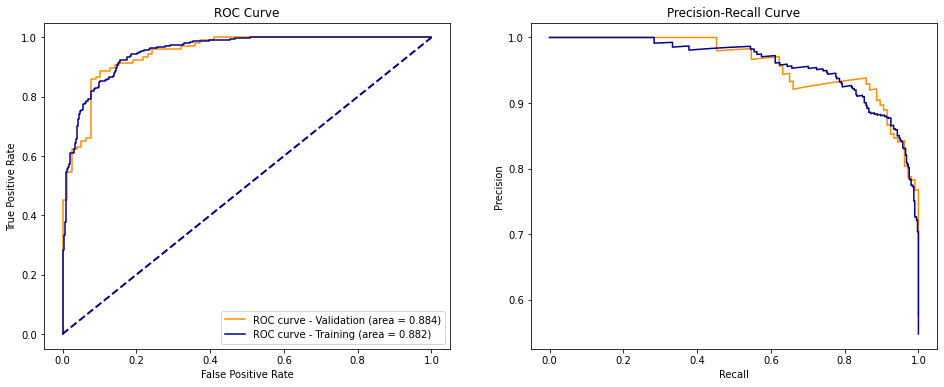

In [64]:
model_performance(p_test_softvoting, p_train_softvoting, p_test_proba_softvoting, p_train_proba_softvoting, y_test, y_train, 'Soft Voting')

In [68]:
df_performance = df_performance.round(2)
df_performance

,Model,Balanced Accuracy,Accuracy,Precision,F1,Recall,ROC AUC
0,Logistic Regression,0.869497,0.875,0.880734,0.893023,0.90566,0.869497
1,Decision Tree,0.845912,0.847826,0.875,0.866667,0.858491,0.845912
2,kNN,0.858732,0.858696,0.892157,0.875,0.858491,0.858732
3,Random Forest,0.891751,0.896739,0.899083,0.911628,0.924528,0.891751
4,SVM,0.888728,0.891304,0.90566,0.90566,0.90566,0.888728
5,XGBoost,0.887034,0.891304,0.898148,0.906542,0.915094,0.887034
6,LGBM,0.86986,0.869565,0.901961,0.884615,0.867925,0.86986
7,Hard Voting,0.891751,0.896739,0.899083,0.911628,0.924528,0.891751
8,Soft Voting,0.884011,0.88587,0.904762,0.900474,0.896226,0.884011
